In [6]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.axes as axe
import matplotlib
import seaborn as sns
import scipy.stats as stats
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer

import and clean initial data

In [7]:
columns = ['year', 'month', 'title', 'abstract', 'first_author', 'journal_name', 'journal_abb', 'language']
df_2014 =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2014_Jan_test.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2015=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2015.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2016=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2016_1.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2013=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2013.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2012=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2012.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)

In [8]:
# function to clean up and wrangle initial data
def clean_pubmed_df(input_df):
    # setting an editing list of each DF to work with
    # clean up the year, and save as an intiger in each DF
    input_df = input_df.copy()
    input_df['year']= input_df['year'].astype(str).str[:4].astype(int)
    # set columns labels 
    columns_names = [ 'Year', 'Month', 'Paper Title', 'Abstract', 'First Author Name', 'Journal Name', 'Journal Abb.', 'Language']
    input_df.columns = columns_names
    # clean up language listing to be uniform
    input_df['Language']= input_df['Language'].astype(str).str[2:5]
    input_df['Abstract']= input_df['Abstract'].astype(str).replace(('[', ']', 'StringElement', '(', ')', "'"),' ')
    input_df['Abstract']= input_df['Abstract'].map(lambda x: x.lstrip('(){}[] StringElement').
                                                   rstrip('(){}[] StringElement'))
    input_df['First Author Name']= input_df['First Author Name'].map(lambda x: x.lstrip('(){}[] ').rstrip('() [] {}'))
    input_df['Journal Name']= input_df['Journal Name'].str.lower()
    return input_df

In [9]:
df_2014_edited = clean_pubmed_df(df_2014)
df_2015_edited = clean_pubmed_df(df_2015)
df_2016_edited = clean_pubmed_df(df_2016)
df_2013_edited = clean_pubmed_df(df_2013)
df_2012_edited = clean_pubmed_df(df_2012)

In [10]:
df_2012_2013 = df_2012_edited.append(df_2013_edited)
df_2012_2013_2014 = df_2012_2013.append(df_2014_edited)
df_2012_2013_2014_2015 = df_2012_2013_2014.append(df_2015_edited)
df_all = df_2012_2013_2014_2015.append(df_2016_edited)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21685 entries, 28473730 to 28040198
Data columns (total 8 columns):
Year                 21685 non-null int32
Month                21685 non-null int64
Paper Title          21685 non-null object
Abstract             21685 non-null object
First Author Name    21685 non-null object
Journal Name         21685 non-null object
Journal Abb.         21685 non-null object
Language             21685 non-null object
dtypes: int32(1), int64(1), object(6)
memory usage: 1.4+ MB


# Back to the Point: Regression analysis

This project is designed to search for trends within the Pubmed Publication database.

To start I am undergong a fishing expodition to identify if the rate of publications change throughout the year, if the rate per month- changes by year, or if within publications frequency of publication types changes by year. I am also considering if trends within publications are present (identified by word assocition within title or abstract) either by year, time of year, or within given topics.

My dataset consists of freely available Pubmed publications from the years of 2012-2017. Using the Entrez biopython module to fetch nested datasets on publications by keyword and date sorting I was able to scrape the abstract, title, first author information, journal title and publication date (month/year) for papers. A complete scrapping by year (even within the narrowed group) was ~200,000 papers. Therefore dataframe was initially limited to 2,000~5,000 per year. 

The BioPython scrapper Entrez is free to use by private individuals for a set number of interactions. After a rate of interacting with the database the scrapper slowed, and was unable to extract more data. Therefore, the amount of data scrapped was limited by the amount I could upload from the server. As I was unable to control the amount of data or distribution of the data from the total data source (i.e. all papers published and stored on Pubmed with the keyword "cancer") I was to make sure the I extraced data is a random representation of the total data. 

At this point I have 3 questions:

1) Does the rate of publications by month fit a normal distribution? I.e. what does the data look like?

2) Does the overall trend in increase in Cancer papers fit a similar increase in overall publications? Or does the rate of increase differ drastically?

3) Was the difference in monthly publications in 2014 significant? And if so why?

Starting Hypothesis:
Publication rate over 3 years( 2014-2016, inclusive) for PubMed publications containing keyword "Cancer" follow a normal distribution
H0: Distribution fits within a margin of error with normal distribution bell curve.
H1: Distribution does not fit on bell curve, within a margin of error. 

In [19]:
dates_count= df_all.groupby(['Year', 'Month']).Month.count()
#isolate the number of publications by each month/year

chi_squared, p_value = stats.normaltest(dates_count)
print(p_value)
# find p_value likelhood that the distribution of papers by month for all the years
# matches a normal distribution

3.22487385117e-16


In [20]:
print(chi_squared)

71.3409353087


 The reported p value when looking across the four years fits < 0.05, in fact it is 0.0000000000000003224...
 Which is a very convinencing P value. 
 
 the p_value for each year individually is more of a question
 Does each year fall into a normal distribution? Especially given that they have a different N value. 

In [21]:
count_2012= df_2012_edited.groupby(['Year', 'Month']).Month.count()
count_2013= df_2013_edited.groupby(['Year', 'Month']).Month.count()
count_2014= df_2014_edited.groupby(['Year', 'Month']).Month.count()
count_2015= df_2015_edited.groupby(['Year', 'Month']).Month.count()
count_2016= df_2016_edited.groupby(['Year', 'Month']).Month.count()

month_2012 = df_2012_edited['Month']
month_2013 = df_2013_edited['Month']
month_2014 = df_2014_edited['Month']
month_2015 = df_2015_edited['Month']
month_2016 = df_2016_edited['Month']



#isolate the number of publications by each month/year

chi_squared_12, p_value_12 = stats.normaltest(count_2012)
chi_squared_13, p_value_13 = stats.normaltest(count_2013)
chi_squared_14, p_value_14 = stats.normaltest(count_2014)
chi_squared_15, p_value_15 = stats.normaltest(count_2015)
chi_squared_16, p_value_16 = stats.normaltest(count_2016)

print("The P values measuring the likelhood that the different years  publication trends follow a normal distribution are- 2012: %0.6F, 2013: %0.6F, 2014: %0.6F, 2015: %0.6F and 2016: %0.6F" % (p_value_12,p_value_13, p_value_14, p_value_15, p_value_16))

The P values measuring the likelhood that the different years  publication trends follow a normal distribution are- 2012: 0.000000, 2013: 0.000000, 2014: 0.035866, 2015: 0.000000 and 2016: 0.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [22]:
print(p_value_12)

2.32591939532e-18


All p values are still a lot lower then 0.05 percent. Therefore fit a normal distribution. I would now confidently accept the null hypothesis.

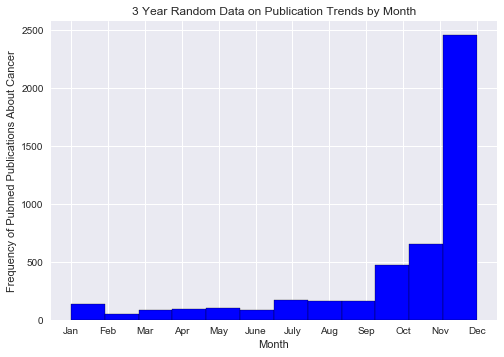

In [23]:
_= plt.hist(x = df_2013_edited['Month'], bins= 12, color = 'blue', histtype = 'bar', edgecolor = 'black')
_ = plt.xlabel('Month')
_= plt.ylabel('Frequency of Pubmed Publications About Cancer')
_= plt.title ('3 Year Random Data on Publication Trends by Month')
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = plt.xticks(months, labels)
_= plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


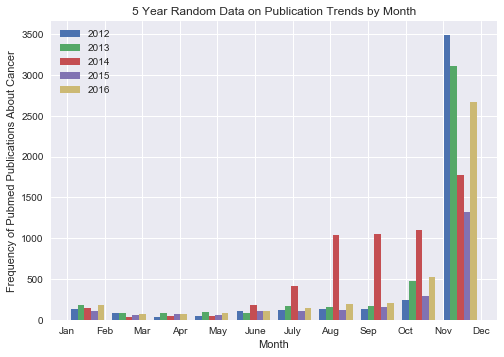

In [24]:


group_all = (month_2012, month_2013, month_2014, month_2015, month_2016)
_=plt.hist(group_all, align= 'mid')
_ = plt.xlabel('Month')
_= plt.ylabel('Frequency of Pubmed Publications About Cancer')
_= plt.title ('5 Year Random Data on Publication Trends by Month')
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = plt.xticks(months, labels)
years = ['2012', '2013', '2014', '2015', '2016']
_= plt.legend( 'upper left', labels = years)

_= plt.show()

What is the margin of error and confidence interval of the publication per month between the years?
This is especially important because the years have different total data points- as is visible in the graph above. 

In [25]:
mean_2012 = np.mean(month_2012)
mean_2013 = np.mean(month_2013)
mean_2014 = np.mean(month_2014)
mean_2015 = np.mean(month_2015)
mean_2016 = np.mean(month_2016)

var_2012 = np.var(month_2012)
var_2013 = np.var(month_2013)
var_2014 = np.var(month_2014)
var_2015 = np.var(month_2015)
var_2016 = np.var(month_2016)

n_2012 = len(month_2012)
n_2013 = len(month_2013)
n_2014 = len(month_2014)
n_2015 = len(month_2015)
n_2016 = len(month_2016)

std_2012 = np.std(month_2012)
std_2013 = np.std(month_2013)
std_2014 = np.std(month_2014)
std_2015 = np.std(month_2015)
std_2016 = np.std(month_2016)


In [26]:
stats.f_oneway( month_2012, month_2013, month_2014, month_2015, month_2016)

F_onewayResult(statistic=225.73566120684927, pvalue=3.4635390317028267e-190)

## Trends within the data
The publications dates are known to follow a normal distribution, as would be expected by a large-scale naturally occuring data set. And important to identify because, although we are using a large dataset (~12K publications across 5 years) it represents a fraction of the total publications in that time (~12K/~1,000K).

So now the question is what are the trends within Pubmed papers, specifically using TFIDF what are trends in unique words or trends across the data? 

TFIDF - Compile a vocabulary of all n-grams in the corpus, use it to build a Document-Term feature matrix ('X') from the most important terms



In [27]:
# define functinon to identify and create a simple DF of top N words from a column of the DF
# As 'Cancer' was a defined keyword (either in title or abstract or topics) for all the papers
# I will add it to the stopwords list now, to keep it from throwing off results
# define functino to identify and create a simple DF of top N words from a column of the DF
def word_freq(df, column, top_N):
    txt = df[column].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(txt)
    stoppunc = ['.', ',', ':', '(', ')', '?', '!', '[', ']', 'cancer', 'Cancer']
    word_dist = nltk.FreqDist(words)

    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords if w not in stoppunc) 

    print('=' * 60)

    print('All frequencies for Paper Titles in 2012, excluding STOPWORDS:')
    print('=' * 60)
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)
    word_freq.rslt = rslt
    print('=' * 60)

In [28]:
# run function on each DF w/'Paper Title' and N=25, save each result
word_freq(df_2012_edited, 'Paper Title', 25)
rslt_12_title = word_freq.rslt

word_freq(df_2013_edited, 'Paper Title', 25)
rslt_13_title = word_freq.rslt

word_freq(df_2014_edited, 'Paper Title', 25)
rslt_14_title = word_freq.rslt

word_freq(df_2015_edited, 'Paper Title', 25)
rslt_15_title = word_freq.rslt

word_freq(df_2016_edited, 'Paper Title', 25)
rslt_16_title = word_freq.rslt

All frequencies for Paper Titles in 2012, excluding STOPWORDS:
            Frequency
Word                 
cell              567
patients          490
cells             447
carcinoma         391
breast            388
study             275
human             256
expression        255
tumor             248
lung              234
treatment         216
therapy           199
case              187
prostate          180
analysis          171
risk              156
clinical          154
gene              150
report            150
using             142
colorectal        137
growth            137
review            135
novel             123
survival          122
All frequencies for Paper Titles in 2012, excluding STOPWORDS:
              Frequency
Word                   
patients            545
cell                518
carcinoma           397
cells               365
breast              364
study               305
tumor               266
expression          264
lung                245
treatment       

In [29]:
rslt_12_title['Year'] = '2012'
rslt_13_title['Year'] = '2013'
rslt_14_title['Year'] = '2014'
rslt_15_title['Year'] = '2015'
rslt_16_title['Year'] = '2016'

In [30]:
#put all data into a single DF
group_all = [rslt_12_title, rslt_13_title, rslt_14_title, rslt_15_title, rslt_16_title]
df_all_ti25 = pd.concat(group_all)

In [31]:
# setting standards for graphs etc. 
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

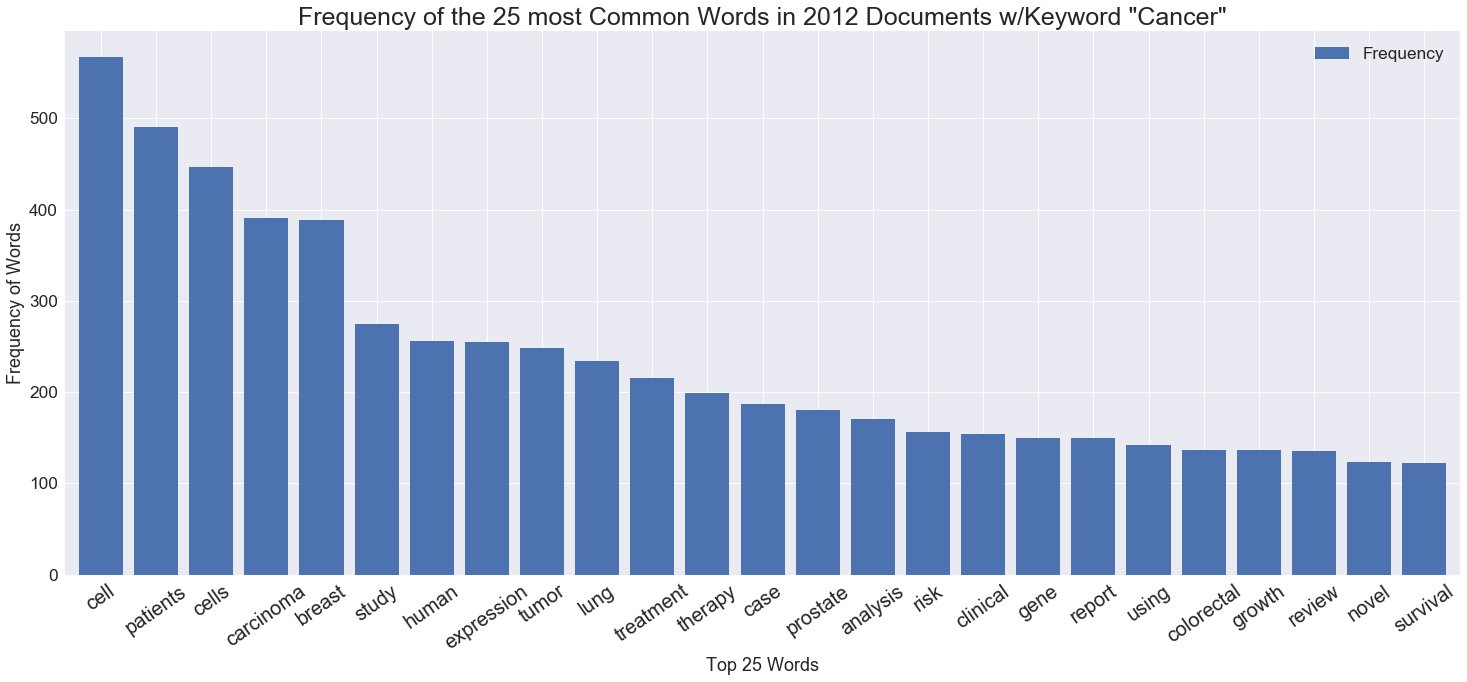

In [35]:
#Visualization of the most 25 common words in the first DF 2012

rslt_12_title.plot.bar( rot=0, figsize=(25,10), width=0.8)
plt.xlabel('Top 25 Words', fontsize = 18)
plt.ylabel('Frequency of Words', fontsize = 18)
plt.title('Frequency of the 25 most Common Words in 2012 Documents w/Keyword "Cancer"', fontsize = 25)
plt.xticks(rotation = 35, fontsize= 20)
plt.show()

## The Goal w/ This Data: 
use NLTK to find trends in most common words for the various years
Possible Independent X Dependent variable combinations:
    1) identify named entities in the abstracts papers- use bag of words and isolate the most common words in all papers (titles and abstracts) and see how the frequencies change by year

In [37]:
# run function on each DF w/'Paper Title' and N=15, save each result
# Given that not all lists will overlap I am cutting the N so the Graph will be more readable
word_freq(df_2012_edited, 'Paper Title', 15)
rslt_12_ti15 = word_freq.rslt

word_freq(df_2013_edited, 'Paper Title', 15)
rslt_13_ti15 = word_freq.rslt

word_freq(df_2014_edited, 'Paper Title', 15)
rslt_14_ti15 = word_freq.rslt

word_freq(df_2015_edited, 'Paper Title', 15)
rslt_15_ti15 = word_freq.rslt

word_freq(df_2016_edited, 'Paper Title', 15)
rslt_16_ti15 = word_freq.rslt

All frequencies for Paper Titles in 2012, excluding STOPWORDS:
            Frequency
Word                 
cell              567
patients          490
cells             447
carcinoma         391
breast            388
study             275
human             256
expression        255
tumor             248
lung              234
treatment         216
therapy           199
case              187
prostate          180
analysis          171
All frequencies for Paper Titles in 2012, excluding STOPWORDS:
            Frequency
Word                 
patients          545
cell              518
carcinoma         397
cells             365
breast            364
study             305
tumor             266
expression        264
lung              245
treatment         230
human             229
case              220
clinical          210
review            182
therapy           182
All frequencies for Paper Titles in 2012, excluding STOPWORDS:
            Frequency
Word                 
cell              8

In [38]:
# graph together to compare results
# first add year to each DF
rslt_12_ti15['Year'] = '2012'
rslt_13_ti15['Year'] = '2013'
rslt_14_ti15['Year'] = '2014'
rslt_15_ti15['Year'] = '2015'
rslt_16_ti15['Year'] = '2016'

In [44]:
#put all data into a single DF
group_all = [rslt_12_ti15, rslt_13_ti15, rslt_14_ti15, rslt_15_ti15, rslt_16_ti15]
df_all_ti15 = pd.concat(group_all)

In [45]:
df_all_ti15.head(3)

,Frequency,Year
Word,,
cell,567,2012
patients,490,2012
cells,447,2012


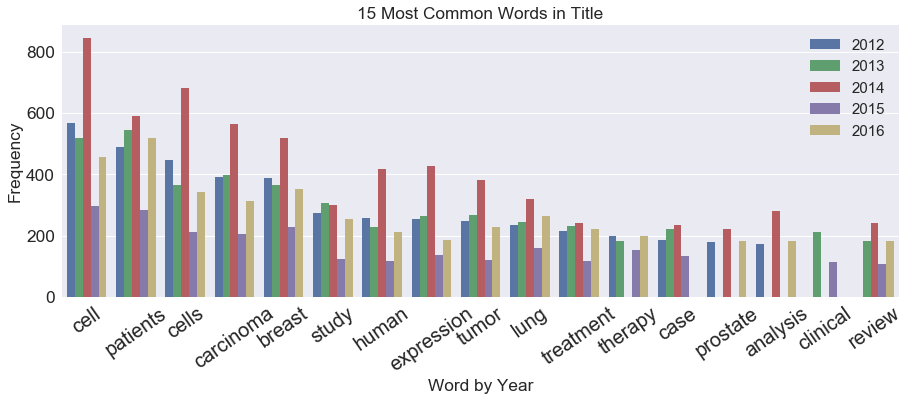

In [57]:
sns.barplot(data= df_all_ti15, x= df_all_ti15.index, hue= 'Year', y= 'Frequency')
plt.xticks(rotation= 35, fontsize = 20)
plt.legend(loc='upper right', fontsize= 15)
plt.xlabel('Word by Year')
plt.title('15 Most Common Words in Title' )
plt.ylabel('Frequency')
plt.show()

This graph is interesting but it has some big problems for understanding the Word Frequency distribution across the 5 years of data. 

## Therefore:

1) The data used so far is "TF" minus the "IDF" so it doesn't take into account common words across this document type

2) it is hard to read trends by year, and identify individual words.

For the 1st problem there is another step w/data we need to do. For the 2nd problem using a Seaborn plot we can better sort the data to visualy be easier to read. 

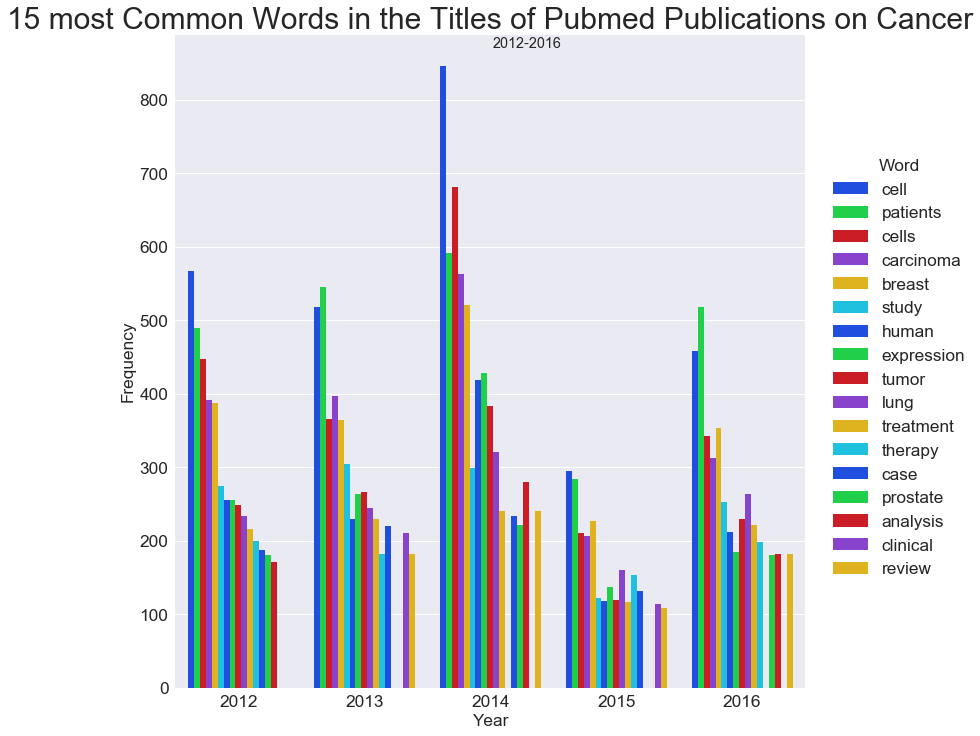

In [58]:
df_all_ti15_noindex = df_all_ti15.reset_index()
g = sns.factorplot("Year", "Frequency", "Word", data=df_all_ti15_noindex, kind="bar", palette = 'bright', size = 10)
g.set_axis_labels("Year", "Frequency");
plt.title('15 most Common Words in the Titles of Pubmed Publications on Cancer', fontsize= 30)
plt.suptitle('2012-2016')
plt.show()

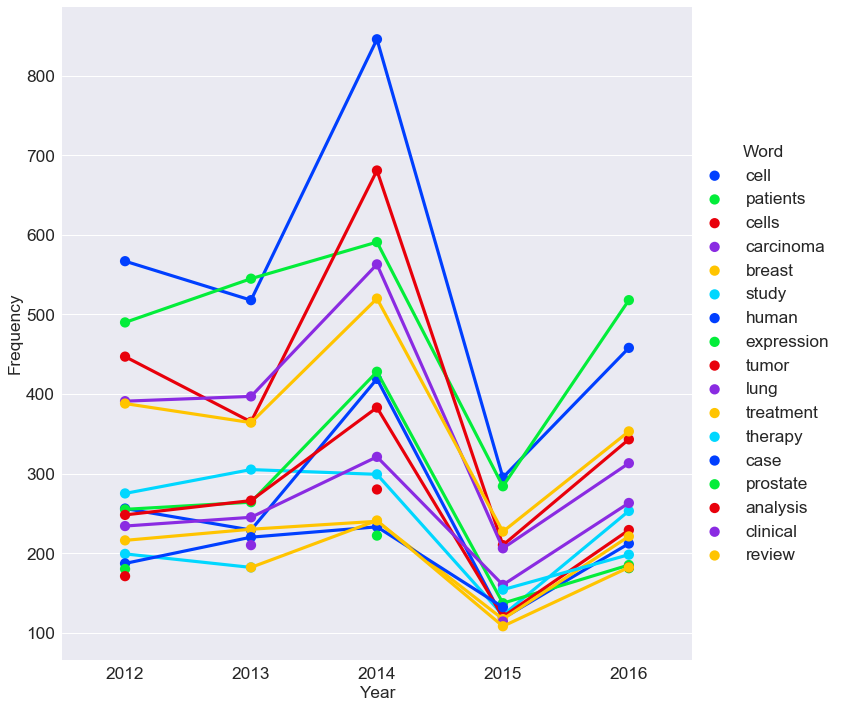

In [85]:
g = sns.factorplot("Year", "Frequency", "Word", data=df_all_ti15_noindex, kind="point", palette = 'bright', size = 10)
g.set_axis_labels("Year", "Frequency");
plt.show()

The line graph makes it very clear that the term frequency of these words across all 5 years is relatively consistent for publication titles. There are a few outliers of words missing from specific years, but the graphs display that there are only a few, and it is hard to tell what words are missing by observation. 

# Therefore:
If there is a difference between words or phrases it is NOT by year or looking at straight frequency. That isn't completely surprsing, given that the overall topics in all of these publications are similar, i.e. cancer. 

The words that are different are interesting. So how do we find if those are of importance?

I will look at cumulative frequencies of the most common words in the titles, and average frequencies to see if there are any large outliers in total frequencies. As is proposed by the blank spaces (i.e. words that do not show up in all 5 years) 

In [59]:
# isolating values in a dataframe to edit and renamed df_1
df_all_ti25_noindex= df_all_ti25.reset_index()
df_1 = df_all_ti25_noindex
df_1.head()

,Word,Frequency,Year
0,cell,567,2012
1,patients,490,2012
2,cells,447,2012
3,carcinoma,391,2012
4,breast,388,2012


In [60]:
df_1['cum_freq'] = df_1.groupby(['Word'])['Frequency'].cumsum()
df_1['year_count']= df_1.groupby(['Word']).cumcount()+1
df_1['avg_freq']= df_1['cum_freq']/df_1['year_count']
# creating new columns w/ information containing total number of years the word is present in
# cumulative frequency of the word across the 5 years, and average frequency. 

In [61]:
# dropping duplicate values, so only the highest cumulative frequency and last year measured is present
df_2 = df_1.sort_values(by=['Word', 'Year']).drop_duplicates(subset='Word', keep='last', inplace=False)

In [119]:
df_2.sort_values('Word').head(5)
# double checked that it worked
df_2

,Word,Frequency,Year,cum_freq,year_count,avg_freq
113,analysis,182,2016,866,5,173.200000
97,associated,72,2015,392,3,130.666667
102,breast,353,2016,1852,5,370.400000
104,carcinoma,313,2016,1870,5,374.000000
116,case,164,2016,936,5,187.200000
101,cell,458,2016,2684,5,536.800000
103,cells,343,2016,2046,5,409.200000
46,chemotherapy,122,2013,122,1,122.000000
115,clinical,180,2016,849,5,169.800000
120,colorectal,122,2016,691,5,138.200000


# Graphing cumulative Frequencies vs. Average Frequencies

It will be very clear to tell if any words are outliers and considering the number of publications is different between each year in our data- will give a clearer number if any words in the titles ARE outside the normal distribution and show a variation in data we need to explore more at this stage. 

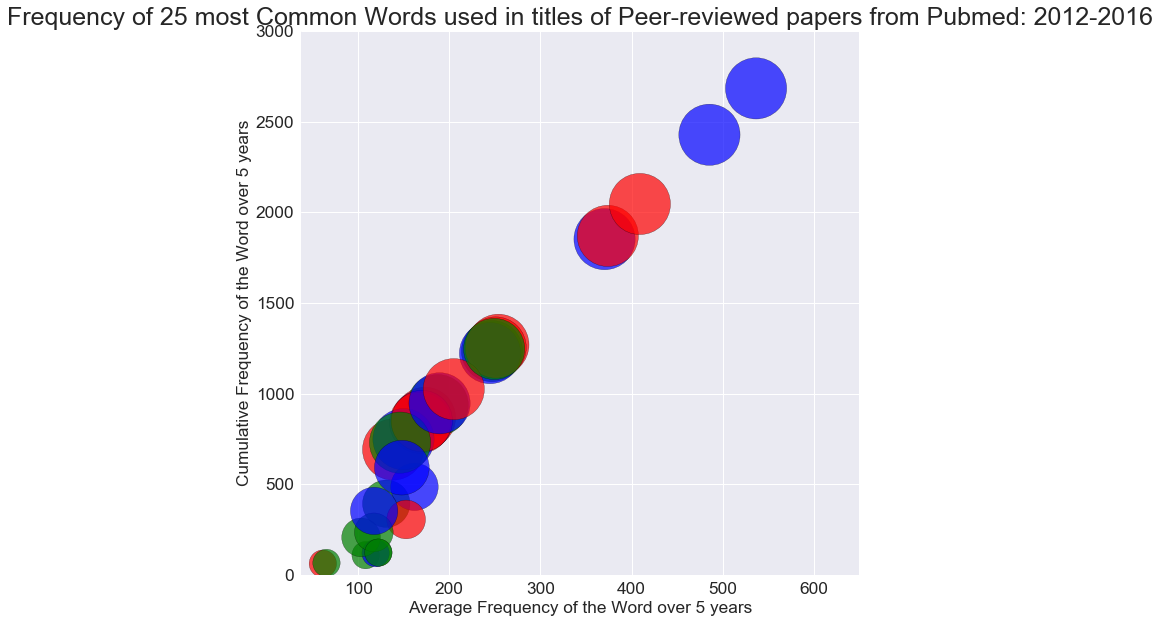

In [66]:
x= df_2['avg_freq']
y = df_2['cum_freq']
z = df_2['year_count']
w= df_2['Word']

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

_= plt.scatter(x, y, s=z*750, alpha = 0.7, color='RGB', cmap= 'plasma', edgecolor= 'black')
_= plt.xlabel('Average Frequency of the Word over 5 years')
_= plt.ylabel('Cumulative Frequency of the Word over 5 years')
_=plt.title('Frequency of 25 most Common Words used in Titles of Peer-reviewed papers from Pubmed: 2012-2016', fontsize= 25 )
_=plt.ylim(ymax= 3000, ymin= 0)
_= plt.xlim(xmax= 650)
_= plt.show()

# Analysis:
All the words follow a trend that their average frequency and cumulative frequencies match - therefore none of the words found in the titles identified here (using pure frequency langugage processing) are disproportionately common in any given year. 

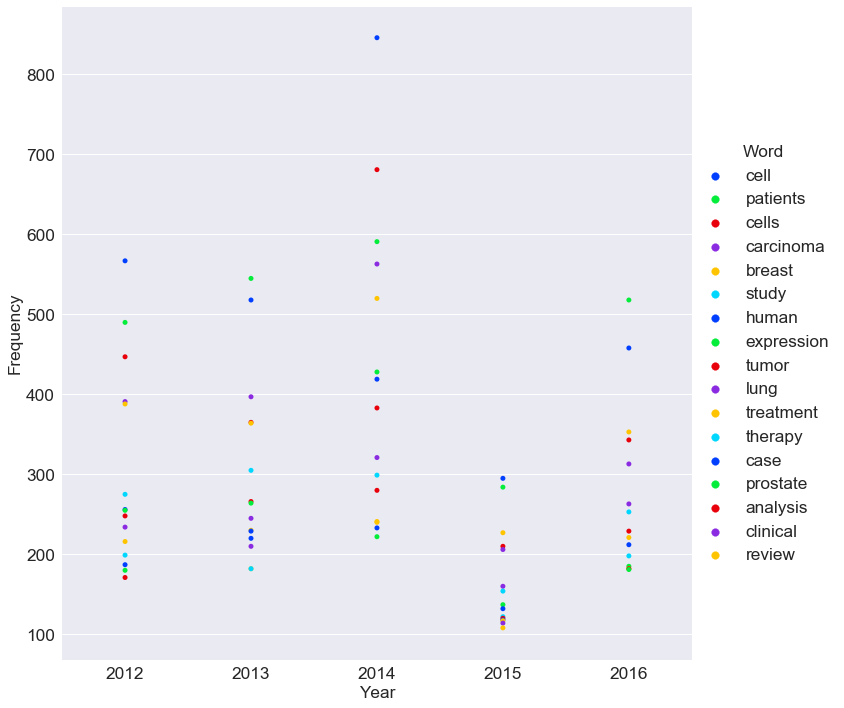

In [86]:
g = sns.factorplot("Year", "Frequency", "Word", data=df_all_ti15_noindex, kind="strip", palette = 'bright', size = 10)
g.set_axis_labels("Year", "Frequency");
plt.show()